# Effort and cost Estimation in Agile Software Development

In [11]:
#@title Effort Estimation on Maxwell
import math
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from matplotlib.colors import ListedColormap  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

from sklearn.metrics import classification_report

data_read = pd.read_csv('/content/drive/MyDrive/Btp/Ultra/special work/datasets/desharnais.csv')

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
data_read = pd.read_csv('/content/drive/MyDrive/Btp/Ultra/special work/datasets/desharnais.csv')

In [14]:
data_read.head()

,id,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language
0,1,1,1,4,85,12,5152,253,52,305,34,302,1
1,2,2,0,0,86,4,5635,197,124,321,33,315,1
2,3,3,4,4,85,1,805,40,60,100,18,83,1
3,4,4,0,0,86,5,3829,200,119,319,30,303,1
4,5,5,0,0,86,4,2149,140,94,234,24,208,1


In [15]:
#@title Defining Category 1 and Category 2


features = [	'TeamExp','ManagerExp','Length' ,	'Transactions',	'Entities',	'PointsNonAdjust',	'Adjustment',	'PointsAjust']




Cat_1 = data_read[features]
Cat_2 = data_read['Effort']

In [16]:
#For Debugging Purpose
 
##Cat_1=data_read.drop(['Actual_Cost'],axis=1).values
#Cat_1=data_read(db_a).values
#Cat_1=data_read['Effort',	'Vi',	'D',	'V',	'Sprint_Size',	'Work_days',	'Team_Salary',	'Act_Time',	'Est_time'].values
##Cat_2=data_read['Actual_Cost'].values



#@title Describing Categorical Data 
Cat_1.describe()


,TeamExp,ManagerExp,Length,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,2.185185,2.530864,11.666667,182.123457,122.333333,304.456790,27.629630,289.234568
std,1.415195,1.643825,7.424621,144.035098,84.882124,180.210159,10.591795,185.761088
min,-1.000000,-1.000000,1.000000,9.000000,7.000000,73.000000,5.000000,62.000000
25%,1.000000,1.000000,6.000000,88.000000,57.000000,176.000000,20.000000,152.000000
50%,2.000000,3.000000,10.000000,140.000000,99.000000,266.000000,28.000000,255.000000
75%,4.000000,4.000000,14.000000,224.000000,169.000000,384.000000,35.000000,351.000000
max,4.000000,7.000000,39.000000,886.000000,387.000000,1127.000000,52.000000,1116.000000


In [17]:
#For debugging purpose
#print(Cat_1)

In [18]:
#@title Describe the raw Data of splitted trained set from the dataframe
display(Cat_1)

,TeamExp,ManagerExp,Length,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust
0,1,4,12,253,52,305,34,302
1,0,0,4,197,124,321,33,315
2,4,4,1,40,60,100,18,83
3,0,0,5,200,119,319,30,303
4,0,0,4,140,94,234,24,208
...,...,...,...,...,...,...,...,...
76,4,4,12,229,169,398,39,414
77,4,3,12,227,73,300,34,297
78,4,4,24,395,193,588,40,617
79,4,3,12,469,176,645,43,697


In [19]:
print('The overall number of projects are: ',len(Cat_2))

The overall number of projects are:  81


In [20]:
display(Cat_2)

0      5152
1      5635
2       805
3      3829
4      2149
      ...  
76     1400
77     2800
78     9520
79     5880
80    23940
Name: Effort, Length: 81, dtype: int64

In [21]:


from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(Cat_1,Cat_2,test_size=0.20, random_state=0)
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(x_train,y_train)
ml.predict(x_test)
y_pred1 = ml.predict(x_test)

ypredx=len(x_test)
## For Debugging Purpose


# print(len(y_pred1))
# print('xtrain',len(x_train))
# print('xtest',len(x_test))

In [22]:
import math
print(y_test)


22    5775
27    4277
61    1876
13    4172
71    2275
74    3941
30    3927
55    8232
53    2583
26    3542
50    2989
42    2174
48    2331
33    6405
73     595
2      805
57    2723
Name: Effort, dtype: int64


In [23]:
print(y_pred1)

[ 5287.01542534 10645.31365857  1168.44060921  2616.43733912
  3069.43753661  8050.96965221  2261.54896184  5131.81182405
  4091.84747422  6190.38401373  1883.18007399  3356.26904025
  1372.91167033  4054.991936     869.40622036  -399.51226931
  1830.3592158 ]


In [24]:
ml.predict(x_train)
x_train_pred_lr= ml.predict(x_train)

In [25]:
from sklearn.metrics import r2_score


import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math




print('The r Score on the predictrd trained Set: %.2f'% r2_score(y_test,y_pred1))

diff=np.absolute(y_test-y_pred1)
MRE=diff/y_test
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)

#linear effort

The r Score on the predictrd trained Set: -0.52
MMRE 0.577948449283196
MdMRE 0.41102030444937193
PRED 25% 5.88235294117647


In [26]:

#   diff=np.absolute(y_test-y_pred1)
#   MRE=diff/y_test
#   MMRE=np.mean(MRE)

# print('MMRE :',MMRE)

Text(0.5, 1.0, 'Effort Actual vs Predicted Linear Regresssion')

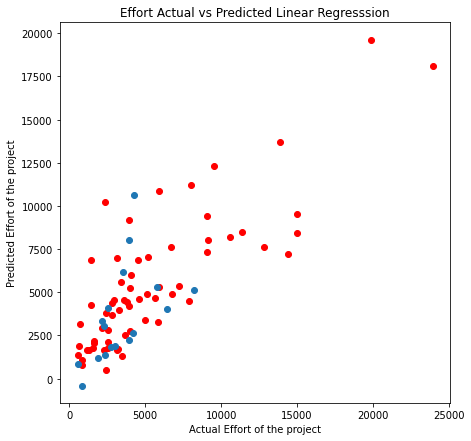

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.scatter(y_train, x_train_pred_lr ,label='Train Data',color='red' )
plt.scatter(y_test, y_pred1)


#plt.scatter()
plt.xlabel('Actual Effort of the project')
plt.ylabel('Predicted Effort of the project')
plt.title('Effort Actual vs Predicted Linear Regresssion')




In [28]:
##Debugging pur   
arr =pd.DataFrame({'Actual  Cost':y_test })
arr1 =pd.DataFrame({'Predicted Cost':y_pred1})

# Now calculating Diffrence between actual and predicted Values

In [29]:
import pandas as pd
pred_y_diff = pd.DataFrame({'Actual Values of Cost':y_test,'Predicted Cost':y_pred1,'Difference':y_test-y_pred1})

#print(pred_y_diff.dtypes)
#
#pred_y_diff= pd.DataFrame(range(3), columns=['y_pred1'])
#pred_y_diff.y_pred1 = pred_y_diff.y_pred1.astype(float)


pred_y_diff[0:21]


,Actual Values of Cost,Predicted Cost,Difference
22,5775,5287.015425,487.984575
27,4277,10645.313659,-6368.313659
61,1876,1168.440609,707.559391
13,4172,2616.437339,1555.562661
71,2275,3069.437537,-794.437537
74,3941,8050.969652,-4109.969652
30,3927,2261.548962,1665.451038
55,8232,5131.811824,3100.188176
53,2583,4091.847474,-1508.847474
26,3542,6190.384014,-2648.384014


In [30]:
#arr = pred_y_diff.to_numpy()
arr =pd.DataFrame({'Actual  Cost':y_test })
arr1 =pd.DataFrame({'Predicted Cost':y_pred1})
arr2 =pd.DataFrame({'Difference':y_test-y_pred1})

In [31]:

print(arr)

    Actual  Cost
22          5775
27          4277
61          1876
13          4172
71          2275
74          3941
30          3927
55          8232
53          2583
26          3542
50          2989
42          2174
48          2331
33          6405
73           595
2            805
57          2723


In [32]:
print(np.absolute(arr2))

     Difference
22   487.984575
27  6368.313659
61   707.559391
13  1555.562661
71   794.437537
74  4109.969652
30  1665.451038
55  3100.188176
53  1508.847474
26  2648.384014
50  1105.819926
42  1182.269040
48   958.088330
33  2350.008064
73   274.406220
2   1204.512269
57   892.640784


In [33]:
arr22= [];
arr11=[];
i=1
k=1
for i in arr:
  xx= arr[i]
  arr22.append(xx)
for k in arr1:
  yy= arr1[k]
  arr11.append(yy)

In [34]:
#print(arr22[0][0])
#print(arr11[0][0])
print(len(arr11))
Diff=[];
i=0
#for i in range(0,5):
   # vv=arr22[0][i]-arr11[0][i]
#    Diff.append(vv)
#    print(vv)

1


In [35]:
#pred_y_diff = pd.DataFrame({'Actual  Cost':y_test,'Predicted Cost':y_pred1,'Difference':y_test-y_pred1,'MMRE':1/6((y_test-y_pred1)/y_test) })

In [36]:
# @title KNeiboursRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

#print('x_train length :',len(x_train))
x_train,x_test,y_train,y_test = train_test_split(Cat_1,Cat_2, test_size=0.20, random_state=0)
#print(len(y_pred1))
#print('x_train length:',len(x_train))
#print('x_test length:',len(x_test))

neigh = KNeighborsRegressor(n_neighbors=3, weights='uniform')
neigh.fit(x_train,y_train)
y_pred=neigh.predict(x_test) 

#print(classification_report(y_test,y_pred))

#predict =neigh.predict(y_pred)
#print(neigh.score(y_test, y_pred))

import numpy as np
from sklearn.metrics import mean_absolute_error
#

# The r_sq
print('The r Score on the predictrd trained Set: %.2f'% r2_score(y_test,y_pred))

diff=np.absolute(y_test-y_pred)
MRE=diff/y_test
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)


#KNN EFFORT

The r Score on the predictrd trained Set: -1.25
MMRE 0.9118257374213622
MdMRE 0.41041041041041043
PRED 25% 29.411764705882355


In [37]:
pred_mre = pd.DataFrame({'Actual Values of Cost':y_test,'Predicted Cost':y_pred,'MRE':(y_test-y_pred)/y_test})


pred_mre[0:21]

,Actual Values of Cost,Predicted Cost,MRE
22,5775,9254.000000,-0.602424
27,4277,12943.000000,-2.026187
61,1876,1612.333333,0.140547
13,4172,2303.000000,0.447987
71,2275,1734.666667,0.237509
74,3941,6790.000000,-0.722913
30,3927,4036.666667,-0.027926
55,8232,7639.333333,0.071995
53,2583,2466.333333,0.045167
26,3542,4799.666667,-0.355072


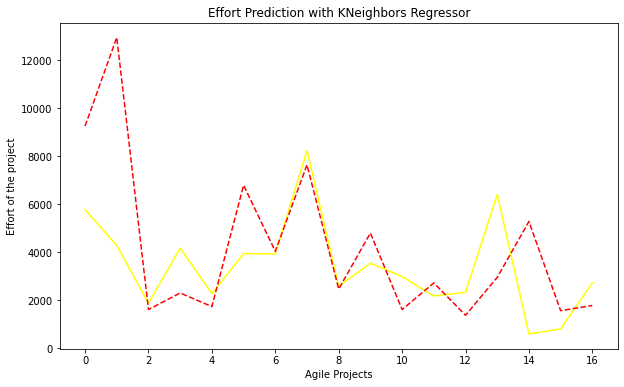

In [38]:
 #plotting the observed and predicted values 


# Setting the boundaries and parameters

plt.rcParams['figure.figsize'] = (10,6)
x_ax =range(len(x_test))
#x_ax2 =range(len(y_test))
#plotting 
plt.plot(x_ax, y_test , label='Actual Observed Value', color='yellow',linestyle='-')
plt.plot(x_ax,y_pred , label='Predicted values ' , color='red' , linestyle ='--')

plt.xlabel('Agile Projects')
plt.ylabel('Effort of the project')
plt.title('Effort Prediction with KNeighbors Regressor')
#plt.legend(bbox_to_anchor =(0.5,-0.2), loc= 'upper center',ncol=2, frameon = True)

plt.show()

----------------------------

In [39]:
# #@title CALCULATING THE MMRE

# #MAKING THE VALUES ABSOLUTE 
# xyy=pred_mre.MRE.abs()
# Raw_mean = xyy.sum()/len(pred_mre) #Total Projects in the Dataset are 21
# #print('MMRE :',Raw_mean)

# # percentage MMRE 
# print(Raw_mean)
# #print('Percentage MMRE :',Raw_mean*100)

Decision Tree Implementation

## Decision Tree Implementation 

In [40]:
data_read.head()

,id,Project,TeamExp,ManagerExp,YearEnd,Length,Effort,Transactions,Entities,PointsNonAdjust,Adjustment,PointsAjust,Language
0,1,1,1,4,85,12,5152,253,52,305,34,302,1
1,2,2,0,0,86,4,5635,197,124,321,33,315,1
2,3,3,4,4,85,1,805,40,60,100,18,83,1
3,4,4,0,0,86,5,3829,200,119,319,30,303,1
4,5,5,0,0,86,4,2149,140,94,234,24,208,1


In [41]:
#Now to Prepare the Input and Output Features
X= data_read.drop(['Effort'],axis=1)
X.shape

(81, 12)

In [42]:
#Splitting the dataset into Trainingfset and test set

#Splitting the dataset
X_train,X_test,y_train,y_test = train_test_split(Cat_1,Cat_2, test_size=0.20 ,random_state=0)


In [43]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
#Creating and Fitting the model
regressor1 = DecisionTreeRegressor().fit(X_train,y_train)

In [44]:
#The Coeffitient of Detern=mination 
print('Training R_sq is : %.2f'% regressor1.score(X_train,y_train))

Training R_sq is : 1.00


In [45]:
# For the training model EVALUATION
from  sklearn.metrics import mean_absolute_error , mean_squared_error, explained_variance_score , r2_score

In [46]:
#prediction on the training Dataset
y_train_pred = regressor1.predict(X_train)



In [47]:

# The r_sq
print('The r_sq  is: %.2f'% r2_score(y_train,y_train_pred))

The r_sq  is: 1.00


In [48]:
#prediction on testing the data
y_test_pred_dt = regressor1.predict(X_test)
print("Mean Squared Error::",mean_squared_error(y_test,y_test_pred_dt))
print("Mean Absolute Error::",mean_absolute_error(y_test,y_test_pred_dt))
xv= math.sqrt(mean_squared_error(y_test,y_test_pred_dt))
print("Root Mean Squared Error::",xv)

Mean Squared Error:: 3017713.411764706
Mean Absolute Error:: 1297.0588235294117
Root Mean Squared Error:: 1737.1567032840492


In [49]:
# The r_sq
print('The r Score on the predictrd trained Set: %.2f'% r2_score(y_test,y_test_pred_dt))



The r Score on the predictrd trained Set: 0.17


<function matplotlib.pyplot.show(*args, **kw)>

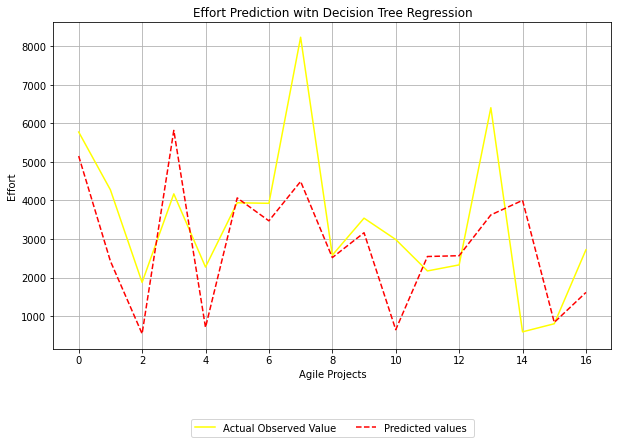

In [50]:
# plotting the observed and predicted values 


# Setting the boundaries and parameters

plt.rcParams['figure.figsize'] = (10,6)
x_ax =range(len(X_test))
#x_ax2 =range(len(y_test))
#plotting 
plt.plot(x_ax, y_test , label='Actual Observed Value', color='yellow',linestyle='-')
plt.plot(x_ax,y_test_pred_dt , label='Predicted values ' , color='red' , linestyle ='--')
plt.grid()
plt.xlabel('Agile Projects')
plt.ylabel('Effort')
plt.title('Effort Prediction witn Decision Tree Regression')
plt.legend(bbox_to_anchor =(0.5,-0.2), loc= 'upper center',ncol=2, frameon = True)

plt.show

In [51]:
pred_mre = pd.DataFrame({'Actual Values of Effort':y_test,'Predicted Effort':y_test_pred_dt,'MRE':(y_test-y_test_pred_dt)/y_test})
#rel=(xyy/5)
#print(sum(rel)/5)
pred_mre[0:21]

,Actual Values of Effort,Predicted Effort,MRE
22,5775,5152.0,0.107879
27,4277,2429.0,0.432079
61,1876,546.0,0.708955
13,4172,5817.0,-0.394295
71,2275,710.0,0.687912
74,3941,4067.0,-0.031972
30,3927,3472.0,0.115865
55,8232,4494.0,0.454082
53,2583,2520.0,0.024390
26,3542,3164.0,0.106719


CALCULATING MRE MMRE MdMRE and PRED 25

In [52]:
# The r_sq
print('The r Score on the predictrd trained Set: %.2f'% r2_score(y_test,y_test_pred_dt))

diff=np.absolute(y_test-y_test_pred_dt)
MRE=diff/y_test
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)

#DT EFFORT

The r Score on the predictrd trained Set: 0.17
MMRE 0.6313778478087828
MdMRE 0.39429530201342283
PRED 25% 47.05882352941176


In [53]:
import pandas as pd
pred_y_diff = pd.DataFrame({'Actual Values of Effort':y_test,'Predicted Effort':y_test_pred_dt,'Difference':y_test-y_test_pred_dt})

pred_y_diff[0:21]

,Actual Values of Effort,Predicted Effort,Difference
22,5775,5152.0,623.0
27,4277,2429.0,1848.0
61,1876,546.0,1330.0
13,4172,5817.0,-1645.0
71,2275,710.0,1565.0
74,3941,4067.0,-126.0
30,3927,3472.0,455.0
55,8232,4494.0,3738.0
53,2583,2520.0,63.0
26,3542,3164.0,378.0


In [54]:
#@title Random Forest Implementation
from sklearn.model_selection  import train_test_split
X_train,X_test,y_train,y_test = train_test_split(Cat_1,Cat_2, test_size=0.20 ,random_state=0)

In [55]:
from sklearn.ensemble import RandomForestRegressor
model2= RandomForestRegressor(n_estimators=30, random_state=30)

In [56]:
#Fitting the  model 
LL_rf = model2.fit(X_train,y_train)


In [57]:
#prediction on testing the data
y_test_pred_rf = model2.predict(X_test)

In [58]:
#Training Model Evaluation


print('The Model Score on the predictrd training Set: %.2f'% LL_rf.score(X_train,y_train))
print('r2 Score ', r2_score(y_test,y_test_pred_rf))

The Model Score on the predictrd training Set: 0.88
r2 Score  0.3502879004423334


In [59]:
print("Mean Squared Error::",mean_squared_error(y_test,y_test_pred_rf))
print("Mean Absolute Error::",mean_absolute_error(y_test,y_test_pred_rf))
xv= math.sqrt(mean_squared_error(y_test,y_test_pred_rf))
print("Root Mean Squared Error::",xv)

Mean Squared Error:: 2372046.9704575166
Mean Absolute Error:: 1177.7960784313727
Root Mean Squared Error:: 1540.1451134414303


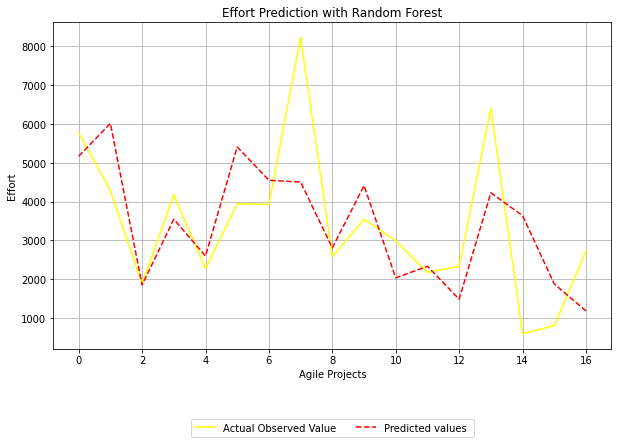

In [60]:
# plotting the observed and predicted values 


# Setting the boundaries and parameters

plt.rcParams['figure.figsize'] = (10,6)
x_ax =range(len(X_test))

#plotting 
plt.plot(x_ax, y_test , label='Actual Observed Value', color='yellow',linestyle='-')
plt.plot(x_ax,y_test_pred_rf , label='Predicted values ' , color='red' , linestyle ='--')
plt.grid()
plt.xlabel('Agile Projects')
plt.ylabel('Effort')
plt.title('Effort Prediction with Random Forest')
plt.legend(bbox_to_anchor =(0.5,-0.2), loc= 'upper center',ncol=2, frameon = True)

In [61]:
pred_mre = pd.DataFrame({'Actual Values of Cost':y_test,'Predicted Cost':y_test_pred_rf,'MRE':(y_test-y_test_pred_rf)/y_test})
#rel=(xyy/5)
#print(sum(rel)/5)
pred_mre[0:21]

,Actual Values of Cost,Predicted Cost,MRE
22,5775,5165.766667,0.105495
27,4277,6012.066667,-0.405674
61,1876,1851.033333,0.013308
13,4172,3544.333333,0.150447
71,2275,2595.700000,-0.140967
74,3941,5407.266667,-0.372054
30,3927,4546.733333,-0.157813
55,8232,4500.300000,0.453316
53,2583,2806.533333,-0.086540
26,3542,4410.233333,-0.245125


In [62]:
# The r_sq
print('The r Score on the predictrd trained Set: %.2f'% r2_score(y_test,y_test_pred_rf))

diff=np.absolute(y_test-y_test_pred_rf)
MRE=diff/y_test
MMRE=np.mean(MRE)
MdMRE=np.median(MRE)
P=MRE[MRE<.25]
Pred=(P.size/MRE.size) * 100
print("MMRE",MMRE)
print("MdMRE",MdMRE)
print("PRED 25%",Pred)



The r Score on the predictrd trained Set: 0.35
MMRE 0.6022790528905165
MdMRE 0.3195271551243448
PRED 25% 47.05882352941176


In [63]:
#@title CALCULATING THE MMRE

#MAKING THE VALUES ABSOLUTE 
xyy=pred_mre.MRE.abs()
Raw_mean = xyy.sum()/ypredx #Total Projects in the Dataset are 21
print('MMRE :',Raw_mean)

MMRE_RF = Raw_mean*100
# percentage MMRE 
###print(' MMRE in Percentage :',Raw_mean*100,'%')

MMRE : 0.6022790528905165


# Support Vector Machine

In [64]:
#@title Support Vector
#import warnings
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.model_selection import GridSearchCV


# Categorical To continious 
X_train,X_test,y_train,y_test = train_test_split(Cat_1,Cat_2, test_size=0.20, random_state=0)


svm = SVC(kernel="linear",C=1)
svm.fit(X_train,y_train)

#clf = svm.SVC()
#clf.fit(Cat_1, Cat_2)

y_pred_svm=svm.predict(X_test)
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
#
print("Mean Absolute error:::",np.sqrt(mean_absolute_error(y_test,y_pred_svm)))

print("Mean Squared Error::",mean_squared_error(y_test,y_pred_svm))
xv= math.sqrt(mean_squared_error(y_test,y_pred_svm))
print("Root Mean Squared Error::",xv)


Mean Absolute error::: 40.77340540395534
Mean Squared Error:: 4137821.1764705884
Root Mean Squared Error:: 2034.1635078013244


In [65]:
#prediction on testing the data
#y_test_pred_svm = y_pred111.predict(y_test,y_test_pred_svm)

In [66]:
import pandas as pd
pred_y_diff = pd.DataFrame({'Actual Values of Effort':y_test,'Predicted Effort':y_pred_svm,'Difference':y_test-y_pred_svm})

pred_y_diff[0:21]

,Actual Values of Effort,Predicted Effort,Difference
22,5775,9135,-3360
27,4277,3948,329
61,1876,1155,721
13,4172,3913,259
71,2275,3647,-1372
74,3941,7252,-3311
30,3927,5817,-1890
55,8232,4494,3738
53,2583,3276,-693
26,3542,3164,378


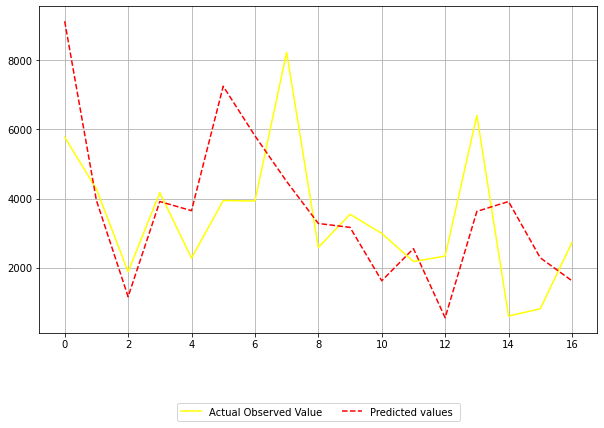

In [67]:
# plotting the observed and predicted values 


# Setting the boundaries and parameters

plt.rcParams['figure.figsize'] = (10,6)
x_ax =range(len(x_test))

#plotting 
plt.plot(x_ax, y_test , label='Actual Observed Value', color='yellow',linestyle='-')
plt.plot(x_ax,y_pred_svm , label='Predicted values ' , color='red' , linestyle ='--')
plt.grid()

plt.legend(bbox_to_anchor =(0.5,-0.2), loc= 'upper center',ncol=2, frameon = True)
plt.show()

In [68]:
#@title Decision tree
# from sklearn import svm
# from sklearn.tree import DecisionTreeRegressor

# #from sklearn.model_selection import train_test_split
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt


# data_read = pd.read_csv('Zia_upd22.csv')

# X = data_read.iloc[:,0:8].values
# y = data_read.iloc[:,:-1].values
# regressor = DecisionTreeRegressor(random_state =0)
# regressor.fit(X, y)




In [69]:
# # @title Let Us calculate Estimated Cost With Raw Data
# x=regressor.predict([[154,4.2,0.77,2.7,12,22,310000,63]])
# print("Estimated Cost:",x[0]*100000)



In [70]:
# #@title Decision Tree Regression 
# from sklearn.model_selection import train_test_split
# from sklearn import svm
# from sklearn.tree import DecisionTreeRegressor

# #from sklearn.model_selection import train_test_split
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt


# #data_read = pd.read_csv('Zia_upd22.csv')

# #X = data_read.iloc[:,1:8].values
# #y = data_read.iloc[:,-1].values
# #X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.20 )



In [71]:
# X.shape

In [72]:
# print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

In [73]:
# regressor1 = DecisionTreeRegressor().fit(X_train,y_train)

#coefficient of determination 
# print('Training R_sq is : %.2f'% regressor1.score(X_train,y_train))

In [74]:
# For the training model EVALUATION
# from  sklearn.metrics import mean_absolute_error , mean_squared_error, explained_variance_score , r2_score

In [75]:
#Prediction on the training dataset
y_train_pred= regressor1.predict(X_train)
#y_train= regressor1.predict(X_train)

In [76]:
# The r_sq
# print('The r_sq ,is :',r2_score(y_train,y_train_pred))

In [77]:
# The MAE
print('The MAE is :  ', mean_absolute_error(y_train,y_train_pred))

The MAE is :   0.0


In [78]:
  # MSE 
  print('The MSE is :  ', mean_squared_error(y_train,y_train_pred))

The MSE is :   0.0


In [79]:
# RMSE 
print('The RMSE is :', np.sqrt(mean_squared_error(y_train,y_train_pred)))

The RMSE is : 0.0


In [80]:
#Prediction on the testing Data
y_test_pred = regressor1.predict(X_test)
y_test = regressor1.predict(X_test)

Now Calculating r_score 

In [81]:
# The r_sq
print('The r_sq y_test , y_test_pred is: %.2f'% r2_score(y_test,y_test_pred))

The r_sq y_test , y_test_pred is: 1.00


In [82]:
# # plotting the observed and predicted values 


# # Setting the boundaries and parameters

# plt.rcParams['figure.figsize'] = (10,6)
# x_ax =range(len(X_test))

# #plotting 
# plt.plot(x_ax, y_test , label='Actual Observed Value', color='yellow',linestyle='-')
# plt.plot(x_ax,y_test_pred , label='Predicted values ' , color='red' , linestyle ='--')
# plt.grid()
# plt.ylabel('dcscfvfdscd')
# plt.xlabel('fffdcdcscfvfdscd')
# plt.legend(bbox_to_anchor =(0.5,-0.2), loc= 'upper center',ncol=2, frameon = True)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


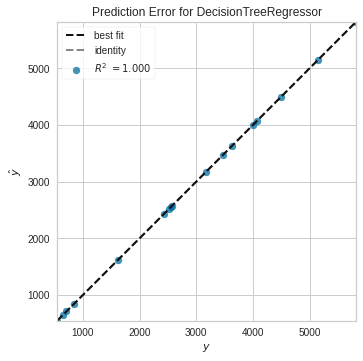

In [83]:
from yellowbrick.regressor import PredictionError 
visualizer = PredictionError(regressor1)
visualizer.fit(X_train, y_train)
visualizer.fit(X_test,y_test)
visualizer.score(X_test,y_test)
visualizer.poof()

In [84]:
# The MAE
print('The MAE is :  ', mean_absolute_error(y_test,y_test_pred ))

The MAE is :   0.0


In [85]:
#pip install yellowbrick

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


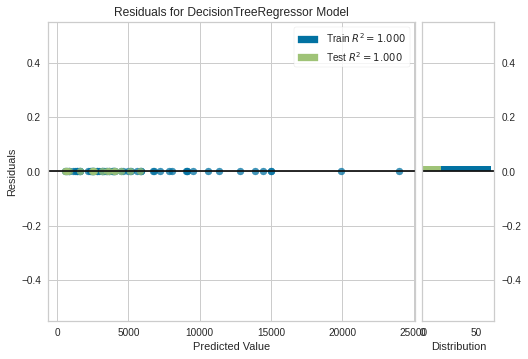

In [86]:
# Residuals plot 
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(regressor1)
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.poof()

In [87]:
# testing the Model Evaluation



In [88]:
# MAE 
print('The MAE is :%.2f'% mean_absolute_error(y_test,y_test_pred))

The MAE is :0.00


In [89]:
# The MSE 
print('The MSE is : %.2f'% mean_squared_error(y_test,y_test_pred))

The MSE is : 0.00


In [90]:
print('The RMSE is : %.2f'% np.sqrt(mean_squared_error(y_test,y_test_pred)))

The RMSE is : 0.00


In [91]:
# k-fold cross-validation
from sklearn.model_selection import cross_val_score

In [92]:
#On the training Dataset
from sklearn.model_selection import cross_val_score
score_train = cross_val_score(regressor1,X_train,y_train,scoring = 'neg_mean_squared_error' , cv= 10)

In [93]:
score_train

array([-59542053.28571428, -18390365.        ,  -7129402.        ,
       -39624841.28571428, -37660452.66666666,  -4162933.83333333,
       -12592297.66666667, -29900102.16666667, -33796026.83333334,
       -28957301.33333333])

In [94]:
score_train = np.mean(score_train)
print(score_train)

-27175577.60714286


In [95]:
# To make make it Positivme 
from numpy import absolute
score_train = absolute(score_train)
score_train

27175577.60714286

In [96]:
# CV on thee testing data 
score_test = cross_val_score(regressor1, X_test, y_test, scoring ='neg_mean_squared_error' , cv= 5)

In [97]:
print(score_test)

[-3461690.75       -5126615.          -307099.33333333 -1842040.66666667
  -315331.33333333]


In [98]:
#The Mean sCORE 
score_test = np.mean(score_test)
score_test

-2210555.416666667

In [99]:
import pandas as pd
pred_y_diff = pd.DataFrame({'Actual Values of Cost':y_test,'Predicted Cost':y_test_pred,'Difference':y_test-y_test_pred})

pred_y_diff[0:21]

,Actual Values of Cost,Predicted Cost,Difference
0,5152.0,5152.0,0.0
1,2429.0,2429.0,0.0
2,546.0,546.0,0.0
3,5817.0,5817.0,0.0
4,710.0,710.0,0.0
5,4067.0,4067.0,0.0
6,3472.0,3472.0,0.0
7,4494.0,4494.0,0.0
8,2520.0,2520.0,0.0
9,3164.0,3164.0,0.0


# Random Forest Regression

In [100]:
# Let us first import The

